Last edit: June 17th, 2018

# Atom transport

<div style="text-align: right;">
<font size="4">Editor: Ryuta Yamamoto</font>
</div>

Ref.)

[1] [XXXX]()

### Load python modules for calculation of trap frequency

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Mathmatics calculation
import sympy as sym
from sympy import symbols, Symbol, init_printing, simplify
from sympy.plotting import plot, plot3d

init_printing()

### Plot parameters

In [2]:
# https://matplotlib.org/users/customizing.html
plt.rcParams["font.size"] = 14
plt.rcParams['xtick.direction'] = 'in' # direction: in, out, or inout
plt.rcParams['ytick.direction'] = 'in' # direction: in, out, or inout
plt.rcParams['axes.linewidth'] = 1.5 # edge linewidth
plt.rcParams['xtick.major.size'] = 4 # major tick size in points
plt.rcParams['xtick.major.width'] = 1.5 # major tick width in points
plt.rcParams['xtick.top'] = True # draw ticks on the top side
plt.rcParams['ytick.major.size'] = 4 # major tick size in points
plt.rcParams['ytick.major.width'] = 1.5 # major tick width in points
plt.rcParams['ytick.right'] = True # draw ticks on the right side

### Symbols for sympy calculation

In [3]:
x, y, z = symbols('x y z', real=True)

wavelengthL = Symbol('\lambda_L', positive=True)

### Physical constants



In [4]:
# Symbol
c_light = Symbol('c', positive=True) # Speed of light (m/s)
h_Plank, hbar = symbols('h, \hbar', positive=True) # Plank constant (J s)
kB = Symbol('k_B', positive=True)# Boltzmann constant (J/K)

# Value
c_light_val = 2.99792458 * 1e8 # Speed of light (m/s)

mu_val = 1.660538782 * 1e-27 # atomic mass unit (kg)

h_Plank_val = 6.62606957 * 1e-34 # Plank constant (J s)
hbar_val = h_Plank_val / (2 * np.pi)

kB_val = 1.3806504 * 1e-23 # Boltzmann constant (J/K)

### Parameters of Rb

In [5]:
mass_Rb_val = 87 * mu_val

wavelengthD_val = np.array([794.978851156 * 1e-9, 780.241209686 * 1e-9]) # wavelength (D1 & D2)
GammaD_val = 2 * np.pi * np.array([5.7500 * 1e6, 6.0666 * 1e6])
omegaD_val = 2 * np.pi * c_light_val / wavelengthD_val

#e = 1.602176565 * 1e-19 # C
#a0 = 0.52917721092 * 1e-10 # Bohr radius (m)
#me = 9.10938215 * 1e-31
#ea0 = hbar**2 / (me * e)

### Parameters of Trap beam

In [6]:
wavelengthL_val = 810* 1e-9 # Wavelength of trap beam (m)
omegaL_val = 2 * np.pi * c_light_val / wavelengthL_val

P_val = 50e-3 # Power of trap beam (W)
w0H_val = 120e-6 # Beam radius along horizontal (m)
w0V_val = w0H_val / 4 #  Beam radius along vertical (m)
w0H_val = 30e-6 # Beam radius along horizontal (m)
w0V_val = w0H_val / 1 #  Beam radius along vertical (m)
I_val = 2 * P_val / (np.pi * (w0H_val * w0V_val)) # Intensity of trap beam

### Polarizability
Optical dipole potential $U({\boldsymbol r})$ is written by
\begin{equation}
U({\boldsymbol r}) = -\dfrac{\pi c^2}{2}
\left(\mathcal{D}_1 + 2\mathcal{D}_2 - g_F m_F \mathcal{P}(\boldsymbol r)
\left[\mathcal{D}_1 - \mathcal{D}_2 \right] \right) I({\boldsymbol r})
\equiv -\dfrac{\alpha}{4} I({\boldsymbol r}),
\end{equation}
where
\begin{eqnarray}
  \mathcal{D}_i &=& \dfrac{\varGamma_{\mathrm{D}_i}}{\omega_{\mathrm{D}_i}^3}
  \left(\dfrac{1}{\omega_{\mathrm{D}_i} - \omega_{\mathrm{L}}}
    + \dfrac{1}{\omega_{\mathrm{D}_i} + \omega_{\mathrm{L}}} \right),
  \mathcal{P}(\boldsymbol r) &\equiv&
    \dfrac{I_{\sigma^+}(\boldsymbol r) - I_{\sigma^-}(\boldsymbol r)}{I(\boldsymbol r)}.
\end{eqnarray}

Then polarizability $\alpha$ defined here is writtne by
\begin{equation}
\alpha = -4 \sum_i\dfrac{\pi c^2 \varGamma_{i}}{2 {\omega_i}^3}
\dfrac{1 - \mathcal{P}g_F m_F}{\varDelta_i}.
\end{equation}
Here we use the rotating wave approximation for above calculation.

[1] [PhD thesis, M. Weinberg (2014)](http://photon.physnet.uni-hamburg.de/fileadmin/user_upload/ILP/Sengstock/Research/SpinorBEC/Theses/WeinbergPhD.pdf)


In [7]:
GammaD = symbols(r'\varGamma_{D_1} \varGamma_{D_2}', real=True)
omegaD = symbols(r'\omega_{D_1} \omega_{D_2}', real=True)
wavelengthD = symbols(r'\lambda_{D_1} \lambda_{D_2}', real=True)
omegaL = Symbol(r'\omega_{L}', real=True)

D = [GammaD[n] / omegaD[n]**3 * (1 / (omegaD[n] - omegaL) + 1 / (omegaD[n] + omegaL)) for n in range(2)]

alpha = - sym.pi * c_light**2 / 2 * (D[0] + 2 * D[1])

alpha

      ⎛                  ⎛            1                           1           
      ⎜2⋅\varGamma_{D_2}⋅⎜───────────────────────── + ────────────────────────
    2 ⎜                  ⎝\omega_{D_2} + \omega_{L}   \omega_{D_2} - \omega_{L
-π⋅c ⋅⎜───────────────────────────────────────────────────────────────────────
      ⎜                                          3                            
      ⎝                              \omega_{D_2}                             
──────────────────────────────────────────────────────────────────────────────
                                                                             2

 ⎞                   ⎛            1                           1            ⎞⎞ 
─⎟   \varGamma_{D_1}⋅⎜───────────────────────── + ─────────────────────────⎟⎟ 
}⎠                   ⎝\omega_{D_1} + \omega_{L}   \omega_{D_1} - \omega_{L}⎠⎟ 
── + ───────────────────────────────────────────────────────────────────────⎟ 
                                              3    

In [8]:
alpha_val = alpha.subs(omegaL, 2 * sym.pi * c_light / wavelengthL)
alpha_val = alpha_val.subs({GammaD[0]: GammaD_val[0], GammaD[1]: GammaD_val[1],
                            omegaD[0]: omegaD_val[0], omegaD[1]: omegaD_val[1],
                            c_light: c_light_val})

array([-45.0669628771031], dtype=object)

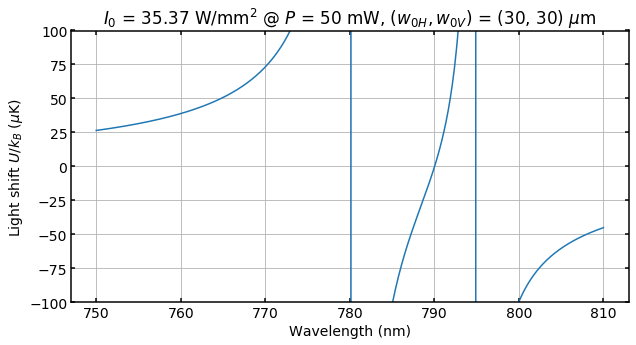

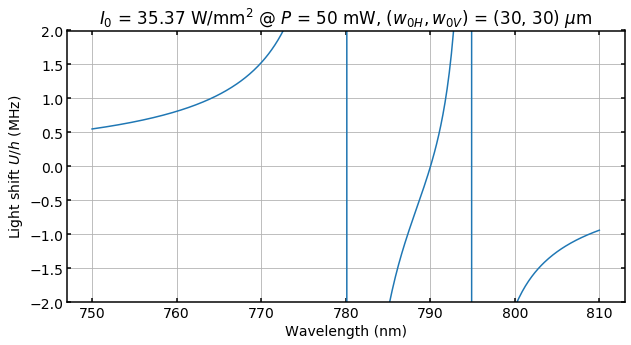

In [49]:
wavelengthL_vals = np.linspace(750, 810, (810 - 750)*8 + 1)
alpha_vals = [alpha_val.subs(wavelengthL, wavelengthL_vals[n]*1e-9).evalf() for n in range(wavelengthL_vals.size)]
U0_vals = np.array(alpha_vals)
U_vals = np.array(alpha_vals) * I_val / kB_val * 1e6

plt.figure(figsize=[10, 5])
plt.ylim([-100, 100])
plt.xlabel('Wavelength (nm)')
plt.ylabel(r'Light shift $U/k_B$ ($\mu$K)')
plt.plot(wavelengthL_vals, U_vals)
plt.grid()
plt.title(r'$I_0$ = %.2f W/$\mathrm{mm}^2$ @ $P$ = %d mW, ($w_{0H}, w_{0V}$) = (%d, %d) $\mu\mathrm{m}$'
          % (I_val * 1e-6, P_val * 1e3, w0H_val * 1e6, w0V_val * 1e6));

plt.figure(figsize=[10, 5])
plt.ylim([-2, 2])
plt.xlabel('Wavelength (nm)')
plt.ylabel(r'Light shift $U/h$ (MHz)')
plt.plot(wavelengthL_vals, U_vals * kB_val * 1e-6 / h_Plank_val * 1e-6)
plt.grid()
plt.title(r'$I_0$ = %.2f W/$\mathrm{mm}^2$ @ $P$ = %d mW, ($w_{0H}, w_{0V}$) = (%d, %d) $\mu\mathrm{m}$'
          % (I_val * 1e-6, P_val * 1e3, w0H_val * 1e6, w0V_val * 1e6));

U_vals[wavelengthL_vals==810]

In [10]:
[U_vals[wavelengthL_vals==799.875], U_vals[wavelengthL_vals==785]]

[array([-101.404530197041], dtype=object),
 array([-101.887061635777], dtype=object)]

In [56]:
LS_list = np.c_[wavelengthL_vals.T, U0_vals.T/kB_val, U0_vals.T/h_Plank_val]
np.savetxt('./LS_list.txt', LS_list, delimiter="\t")

### Photon scattering

\begin{equation}
\varGamma_{\mathrm{sc}} = 
\left(
\dfrac{3 \pi c^2 \varGamma_{D_1}^2}{2 \hbar \omega_{D_1}^3}
\left(\dfrac{\omega_L}{\omega_{D_1}}\right)^3
\left(\dfrac{1}{\omega_{D_1} - \omega_L} + \dfrac{1}{\omega_{D_1} + \omega_L}\right)^2 \dfrac{1}{3}
+ \dfrac{3 \pi c^2 \varGamma_{D_2}^2}{2 \hbar \omega_{D_2}^3}
\left(\dfrac{\omega_L}{\omega_{D_2}}\right)^3
\left(\dfrac{1}{\omega_{D_2} - \omega_L} + \dfrac{1}{\omega_{D_2} + \omega_L}\right)^2 \dfrac{2}{3}
\right)
I
\end{equation}

In [12]:
GammaSCs = [0, 0]
for n in range(2):
    GammaSCs[n] = 3 * sym.pi * c_light**2 * GammaD[n]**2 / (2 * hbar * omegaD[n]**3) * (omegaL/omegaD[n])**3 * (D[n] / (GammaD[n] / omegaD[n]**3))**2 * (n+1) / 3
GammaSCs

⎡                                                                             
⎢            3                2  2 ⎛            1                           1 
⎢π⋅\omega_{L} ⋅\varGamma_{D_1} ⋅c ⋅⎜───────────────────────── + ──────────────
⎢                                  ⎝\omega_{D_1} + \omega_{L}   \omega_{D_1} -
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                     6                       
⎣                                   2⋅\h̅⋅\omega_{D_1}                        

            2                                                                 
           ⎞               3                2  2 ⎛            1               
───────────⎟   π⋅\omega_{L} ⋅\varGamma_{D_2} ⋅c ⋅⎜───────────────────────── + 
 \omega_{L}⎠                                     ⎝\omega_{D_2} + \omega_{L}   
─────────────, ───────────────────────────────────────────────────────────────
                                                   

In [13]:
GammaSCs_val = [0, 0]

for n in range(2):
    GammaSCs_val[n] = GammaSCs[n].subs(omegaL, 2 * sym.pi * c_light / wavelengthL)
    GammaSCs_val[n] = GammaSCs_val[n].subs({GammaD[0]: GammaD_val[0], GammaD[1]: GammaD_val[1],
                                            omegaD[0]: omegaD_val[0], omegaD[1]: omegaD_val[1],
                                            c_light: c_light_val, hbar: hbar_val})

array([9.81246708571585e-8], dtype=object)

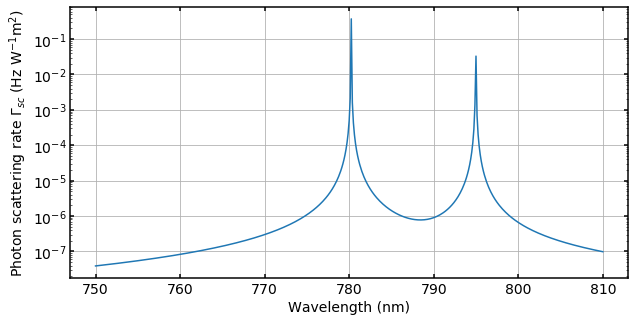

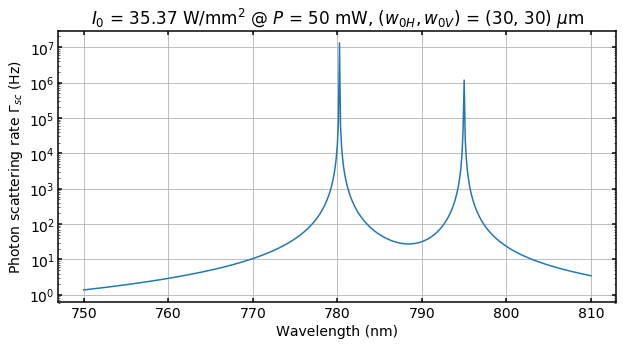

In [59]:
wavelengthL_vals = np.linspace(750, 810, (810 - 750)*8 + 1)
GammaSC_val = GammaSCs_val[0] + GammaSCs_val[1]

GammaSC_vals = [GammaSC_val.subs(wavelengthL, wavelengthL_vals[n]*1e-9).evalf() for n in range(wavelengthL_vals.size)]
GammaSC_vals = np.array(GammaSC_vals)

plt.figure(figsize=[10, 5])
plt.xlabel('Wavelength (nm)')
plt.ylabel(r'Photon scattering rate $\Gamma_{sc}$ (Hz $\mathrm{W}^{-1} \mathrm{m}^2$)')
plt.semilogy(wavelengthL_vals, GammaSC_vals)
plt.grid()

plt.figure(figsize=[10, 5])
plt.xlabel('Wavelength (nm)')
plt.ylabel(r'Photon scattering rate $\Gamma_{sc}$ (Hz)')
plt.semilogy(wavelengthL_vals, GammaSC_vals*I_val)
plt.grid()
plt.title(r'$I_0$ = %.2f W/$\mathrm{mm}^2$ @ $P$ = %d mW, ($w_{0H}, w_{0V}$) = (%d, %d) $\mu\mathrm{m}$'
          % (I_val * 1e-6, P_val * 1e3, w0H_val * 1e6, w0V_val * 1e6));

GammaSC_vals[wavelengthL_vals==810]

In [60]:
np.array([GammaSC_vals[wavelengthL_vals==799.875], GammaSC_vals[wavelengthL_vals==785]])*I_val

array([[24.4643863843001],
       [50.3515351940725]], dtype=object)

In [61]:
PS_list = np.c_[wavelengthL_vals.T, GammaSC_vals.T]
np.savetxt('./PS_list.txt', PS_list, delimiter="\t")

### Parameter estimation

Rayleigh length (mm)

In [16]:
[np.pi * w0H_val**2 / wavelengthL_val * 1e3, np.pi * w0V_val**2 / wavelengthL_val * 1e3]

Trap potential ($\mu$K)

In [17]:
alpha_val_def = alpha_val.subs(wavelengthL, wavelengthL_val).evalf()
alpha_val_def * I_val / kB_val * 1e6

Photon scattering (Hz)

In [18]:
GammaSC_val_def = GammaSC_val.subs(wavelengthL, wavelengthL_val).evalf()
GammaSC_val_def*I_val

### 方向性
- 近共鳴光で短時間（~10 ms?）でトランスポート
- トランスポート先で太いビームでトラップしなおすので多少ビーム径が細く、不安定でも構わない？
- トランスポート中のビーム径変化は極力小さく
- 

### Lens configuration

ref.)
- ヤリーヴ-イエー, "光エレクトロニクス 基礎編"
- [Manuel Endres, PhD thesis](https://edoc.ub.uni-muenchen.de/15506/)

In [19]:
def plot_lens_configuration(f_lens, pos_lens, L_move=0, plot=True):
    yy = np.linspace(-25.4, 25.4, 2)

    lensN = pos_lens.size
    pos_focus = np.zeros(lensN+1)

    dL_val = np.linspace(-200, 2000, 2101)
    w0_ini_val = 7.5 / 2
    zR_ini_val = np.pi * (w0_ini_val * 1e-3)**2 / wavelengthL_val * 1e3

    w0_vals = np.zeros(lensN+1); w0_vals[0] = w0_ini_val
    zR_vals = np.zeros(lensN+1); zR_vals[0] = zR_ini_val

    w_vals = w0_ini_val * np.sqrt(1 + (dL_val / zR_ini_val)**2)
    
    if plot is True:
        fig = plt.figure(figsize=[10, 5])
        ax = plt.axes()

    # fc = face color, ec = edge color
    for n in range(lensN):
        d1_val = pos_lens[n] - pos_focus[n]
        tmp = f_lens[n]**2 / (zR_vals[n]**2 + (d1_val - f_lens[n])**2)
        pos_focus[n+1] = pos_lens[n] + tmp * (d1_val - f_lens[n]) + f_lens[n]
        w0_vals[n+1] = np.sqrt(f_lens[n]**2 / (zR_vals[n]**2 + (d1_val - f_lens[n])**2)) * w0_vals[n]
        zR_vals[n+1] = np.pi * (w0_vals[n+1] * 1e-3)**2 / wavelengthL_val * 1e3

        w_vals[dL_val>pos_lens[n]] = w0_vals[n+1] * np.sqrt(1 + ((dL_val[dL_val>pos_lens[n]] - pos_focus[n+1]) / zR_vals[n+1])**2)
        
        if plot is True:
            lens_vis = patches.Ellipse(xy=(pos_lens[n]-L_move, 0), width=20, height=25.4, fc='#0066aa', ec='#ffffff', alpha=0.25)
            ax.add_patch(lens_vis)
            ax.plot([pos_lens[n]-L_move, pos_lens[n]-L_move], yy, '--', c='#dddddd')
        
    if plot is True:
        ax.plot(dL_val - L_move, w_vals, 'r')
        ax.plot(dL_val - L_move, -w_vals, 'r')
        ax.plot([pos_focus[lensN]-L_move, pos_focus[lensN]-L_move], yy, '--', c='#dddddd',
                label='$dL = %.1f$ mm, $w_0 = %.2f$ $\mu$m, focus position: %.2f mm' % (L_move, w0_vals[lensN]*1e3, pos_focus[lensN]-L_move))
        plt.xlabel('Position (mm)')
        plt.ylabel('Beam radius $w$ (mm)')
        #plt.axis('scaled')
        plt.xlim([-200, 2000]); plt.ylim([-25.4, 25.4]);
        plt.legend(loc='lower right')
    
    return w0_vals, pos_focus

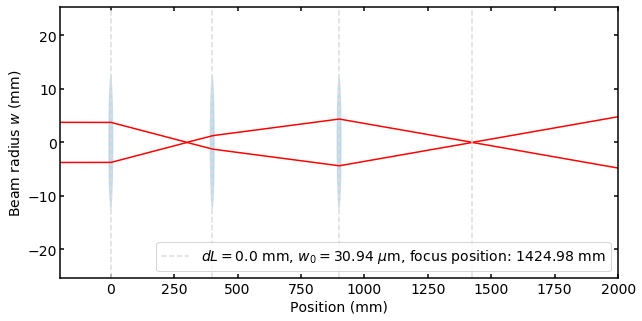

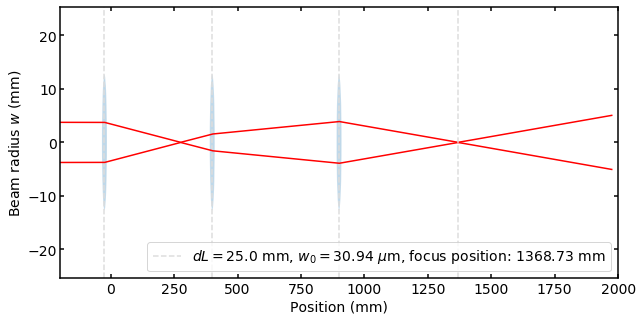

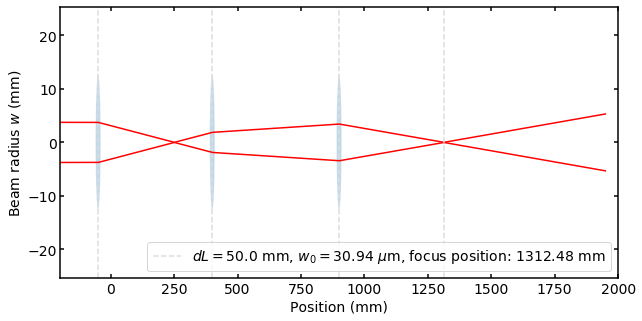

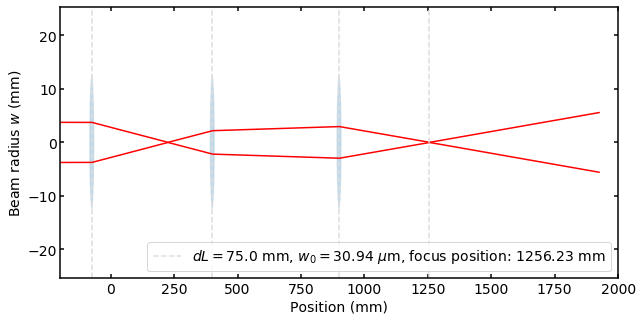

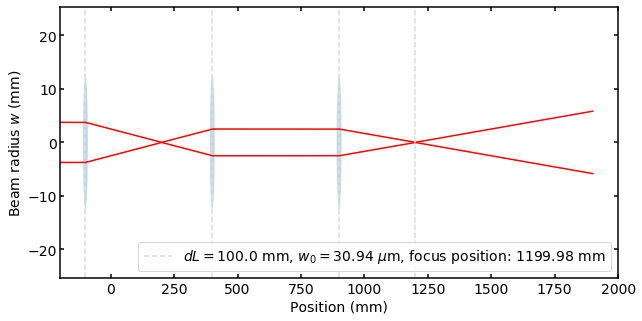

In [20]:
f_lens = np.array([300, 200, 300])
f_lens = np.array([300, 200, 300])
L0 = 0
L1 = L0 + 400

for L_move in [0, 25, 50, 75, 100]:
    pos_lens = np.array([L0, L_move+L1, L_move+L1+f_lens[1]+f_lens[2]])
    
    w0_vals, pos_focus = plot_lens_configuration(pos_lens=pos_lens, f_lens=f_lens, L_move=L_move, plot=True)
#ax.set_aspect('equal')
#[pos_focus, w0_vals*1e3]

In [21]:
pos_lens

array([   0,  500, 1000])

In [22]:
w0_vals * 1e3

array([3750.        ,   20.62616861, 2500.        ,   30.93925292])

In [23]:
omegaD_val / (2*np.pi)

array([3.77107463e+14, 3.84230484e+14])

In [24]:
np.arctan(1/3) * 180/np.pi

In [25]:
L = np.sqrt(4**2 + 12**2) * 25
h = 100
np.arctan(h/L) * 180/np.pi

In [26]:
0.95**6

In [27]:
25*0.74

In [1]:
18.5*0.7

12.95